<a href="https://colab.research.google.com/github/seyyidahmeddjellouli/Deep-Learning-CNN-Course/blob/main/LENET_5_model_sipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 27s 34ms/step - loss: 0.2762 - accuracy: 0.9181 - val_loss: 0.1082 - val_accuracy: 0.9674
Epoch 2/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0876 - accuracy: 0.9726 - val_loss: 0.0661 - val_accuracy: 0.9789
Epoch 3/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.0625 - val_accuracy: 0.9785
Epoch 4/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0496 - accuracy: 0.9842 - val_loss: 0.0529 - val_accuracy: 0.9837
Epoch 5/5
750/750 [==============================] - 26s 35ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0476 - val_accuracy: 0.9848


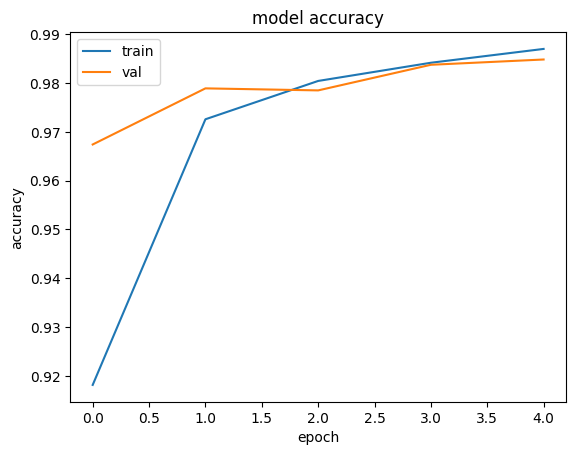

313/313 [==============================] - 2s 7ms/step - loss: 0.0425 - accuracy: 0.9844
Test accuracy: 0.9843999743461609


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the LeNet-5 model
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for MNIST
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the MNIST dataset
import keras
from matplotlib import pyplot as plt

history=model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5, batch_size=64, validation_split=0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels)
print("Test accuracy:", test_acc)

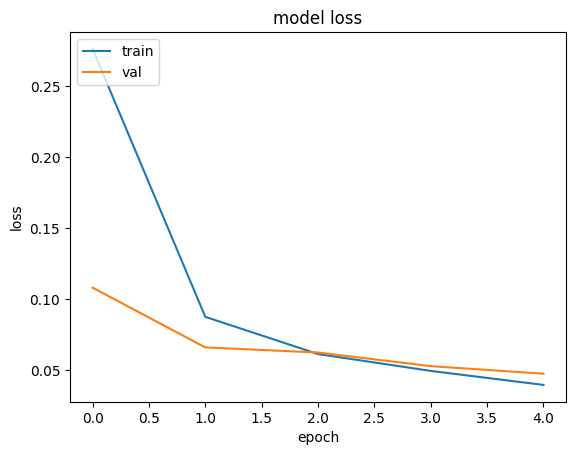

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

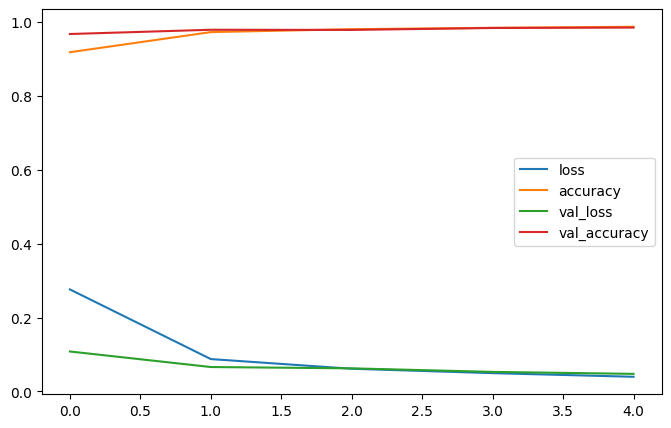

In [5]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()